# XYMA Analytics 

## Problem Statement for DS/ML Interns

### The objective of this exercise is to the predict price for an agricultural commodity. Predict min, max and modal price for the commodity for next 30 days from last date in the data.

In [199]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("C:\\Users\Anurag Sen\Downloads\data (1).csv")
dataset

,priceDate,itemName,state,mandiName,arrivals,unitArrivals,variety,minPrice,maxPrice,modalPrice,priceUnit
0,2005-04-11,Potato,NCT of Delhi,Azadpur,106.0,Tonnes,F.A.Q.,300.0,663.0,475.0,Rs/Quintal
1,2005-04-12,Potato,NCT of Delhi,Azadpur,1745.0,Tonnes,F.A.Q.,325.0,688.0,500.0,Rs/Quintal
2,2005-04-13,Potato,NCT of Delhi,Azadpur,1233.0,Tonnes,F.A.Q.,300.0,688.0,488.0,Rs/Quintal
3,2005-04-16,Potato,NCT of Delhi,Azadpur,1654.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal
4,2005-04-18,Potato,NCT of Delhi,Azadpur,26.0,Tonnes,F.A.Q.,350.0,650.0,475.0,Rs/Quintal
...,...,...,...,...,...,...,...,...,...,...,...
3800,2018-08-27,Potato,NCT of Delhi,Azadpur,97.1,Tonnes,Potato,700.0,2400.0,1410.0,Rs/Quintal
3801,2018-08-28,Potato,NCT of Delhi,Azadpur,973.5,Tonnes,Potato,700.0,2400.0,1410.0,Rs/Quintal
3802,2018-08-29,Potato,NCT of Delhi,Azadpur,1317.9,Tonnes,Potato,700.0,2400.0,1410.0,Rs/Quintal
3803,2018-08-30,Potato,NCT of Delhi,Azadpur,1375.3,Tonnes,Potato,700.0,2400.0,1410.0,Rs/Quintal


In [200]:
dataset.drop(["itemName","state","mandiName","unitArrivals","variety","priceUnit"],axis=1,inplace=True)
dataset.set_index("priceDate",inplace=True)
dataset
data = dataset.interpolate()
data

,arrivals,minPrice,maxPrice,modalPrice
priceDate,,,,
2005-04-11,106.0,300.0,663.0,475.0
2005-04-12,1745.0,325.0,688.0,500.0
2005-04-13,1233.0,300.0,688.0,488.0
2005-04-16,1654.0,350.0,650.0,475.0
2005-04-18,26.0,350.0,650.0,475.0
...,...,...,...,...
2018-08-27,97.1,700.0,2400.0,1410.0
2018-08-28,973.5,700.0,2400.0,1410.0
2018-08-29,1317.9,700.0,2400.0,1410.0


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3805 entries, 2005-04-11 to 2018-08-31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   arrivals    3805 non-null   float64
 1   minPrice    3805 non-null   float64
 2   maxPrice    3805 non-null   float64
 3   modalPrice  3805 non-null   float64
dtypes: float64(4)
memory usage: 148.6+ KB


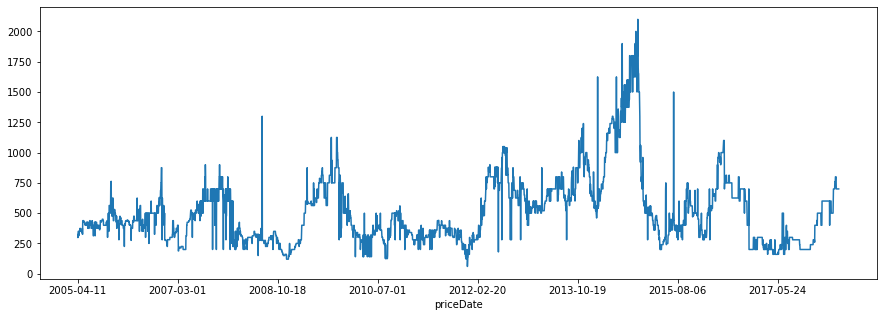

In [202]:
data['minPrice'].plot(figsize=(15,5))

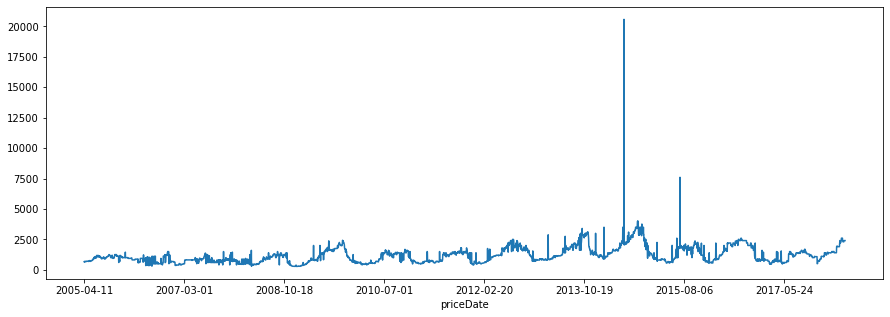

In [203]:
data['maxPrice'].plot(figsize=(15,5))

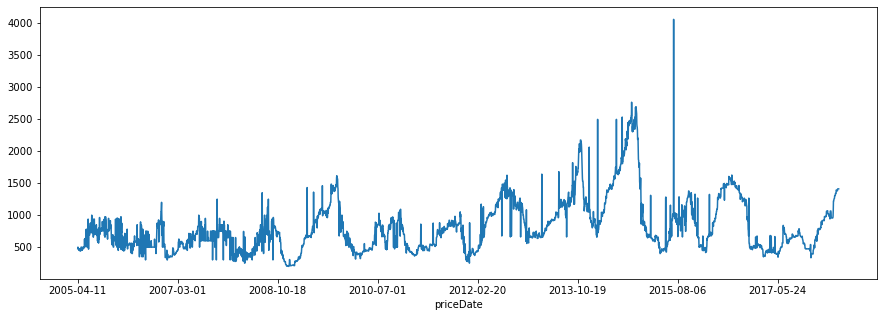

In [204]:
data['modalPrice'].plot(figsize=(15,5))

In [205]:
day_no = 30
day_no = int(day_no)

In [206]:
data.rolling(day_no).mean().tail(10) #30days moving mean

,arrivals,minPrice,maxPrice,modalPrice
priceDate,,,,
2018-08-21,1115.886667,646.000000,2228.000000,1175.633333
2018-08-22,1136.293333,649.333333,2240.000000,1186.900000
2018-08-23,1095.696667,656.000000,2253.333333,1201.033333
2018-08-24,1098.590000,662.666667,2266.666667,1215.166667
2018-08-25,1099.346667,669.333333,2283.333333,1230.333333
2018-08-27,1065.820000,676.000000,2300.000000,1245.500000
2018-08-28,1094.683333,682.666667,2316.666667,1260.666667
2018-08-29,1089.946667,689.333333,2333.333333,1275.833333
2018-08-30,1095.090000,696.000000,2350.000000,1291.000000


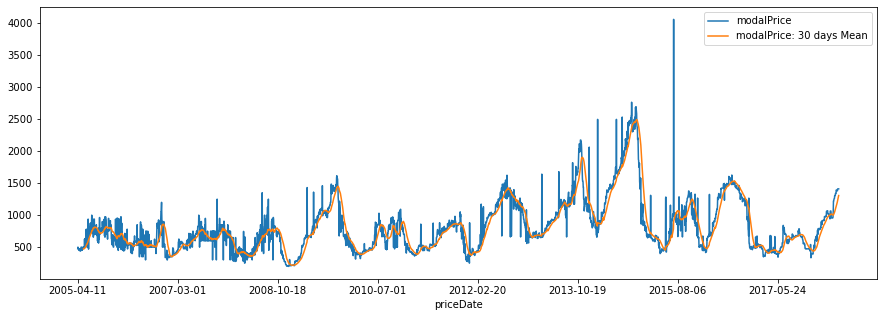

In [207]:
data['modalPrice: 30 days Mean'] = data['modalPrice'].rolling(day_no).mean()
data[['modalPrice','modalPrice: 30 days Mean']].plot(figsize=(15,5))

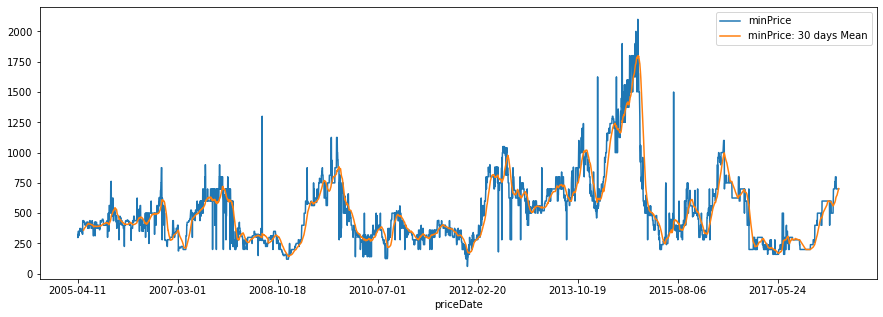

In [208]:
data['minPrice: 30 days Mean'] = data['minPrice'].rolling(day_no).mean()
data[['minPrice','minPrice: 30 days Mean']].plot(figsize=(15,5))

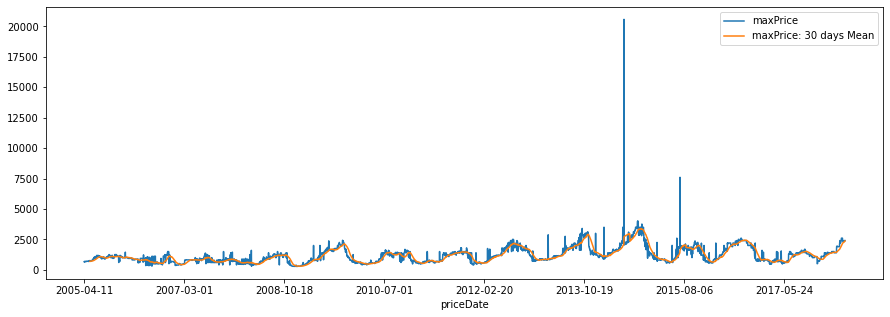

In [209]:
data['maxPrice: 30 days Mean'] = data['maxPrice'].rolling(day_no).mean()
data[['maxPrice','maxPrice: 30 days Mean']].plot(figsize=(15,5))

In [210]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-value : ",dftest[1])
    print("3. No. of Lags : ",dftest[2])
    print("4. No. of Observation used for ADF Regression and Critical Calues : ",dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t",key,": ", val)

In [211]:
#Next 30 Day Prediction of Modal Price

In [212]:
ad_test(data['modalPrice'])

1. ADF :  -3.733155125506414
2. P-value :  0.0036702434874855273
3. No. of Lags :  16
4. No. of Observation used for ADF Regression and Critical Calues :  3788
5. Critical Values : 
	 1% :  -3.4320774912613525
	 5% :  -2.8623033105941613
	 10% :  -2.5671763203675475


In [213]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [214]:
stepwise_fit = auto_arima(data['modalPrice'],trace=True,suppress_warnings=True)
#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=47128.700, Time=7.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48461.454, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=47624.340, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=47144.187, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=48459.465, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=47147.471, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=47146.795, Time=3.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=47129.101, Time=6.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=47140.623, Time=9.82 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=47145.583, Time=2.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=47149.486, Time=2.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=47144.541, Time=4.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=47131.080, Time=7.38 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=47126.458, Time=2.40 sec
 ARIMA(1,1,2)(0,0,0

In [215]:
from statsmodels.tsa.arima_model import ARIMA

In [216]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape,test.shape)

(3805, 7)
(3775, 7) (30, 7)


In [217]:
#Training Model

model = ARIMA(train['modalPrice'],order=(2,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.modalPrice   No. Observations:                 3774
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -23382.934
Method:                       css-mle   S.D. of innovations            118.721
Date:                Sat, 10 Apr 2021   AIC                          46777.868
Time:                        13:15:54   BIC                          46815.284
Sample:                             1   HQIC                         46791.170
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1205      0.879      0.137      0.891      -1.602       1.843
ar.L1.D.modalPrice     0.9891      0.035     28.119      0.000       0.920       1.058
ar.L2.D.modalPrice    -0.0682      0.025     -2.676      0.007      -0.118      -0.018
ma.L1.D.modalPrice    -1.6396      0.031    -53.012      0.000      -1.700      -1.579
ma.L2.D.modalPrice     0.6756      0.023     29.991      0.000       0.631       0.720
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0935           +0.0000j            1.0935            0.0000
AR.2           13.4054           +0.0000j           13.4054            0.0000
MA.1            1.2134           -0.0880j            1.2166           -0.0115
MA.2            1.2134           +0.0880j            1.2166            0.0115
-----------------------------------------------------------------------------
"""

In [218]:
model2 = ARIMA(data['modalPrice'],order=(2,1,2))
model2 = model2.fit()
data.tail()

,arrivals,minPrice,maxPrice,modalPrice,modalPrice: 30 days Mean,minPrice: 30 days Mean,maxPrice: 30 days Mean
priceDate,,,,,,,
2018-08-27,97.1,700.0,2400.0,1410.0,1245.500000,676.000000,2300.000000
2018-08-28,973.5,700.0,2400.0,1410.0,1260.666667,682.666667,2316.666667
2018-08-29,1317.9,700.0,2400.0,1410.0,1275.833333,689.333333,2333.333333
2018-08-30,1375.3,700.0,2400.0,1410.0,1291.000000,696.000000,2350.000000
2018-08-31,1121.0,700.0,2400.0,1411.0,1306.066667,702.666667,2366.666667


In [219]:
index_future_dates = pd.date_range(start='2018-09-01',end='2018-09-30')
modal_price_pred = model2.predict(start=len(data),end=len(data)+29,typ='levels').rename('modalPrice')
modal_price_pred.index=index_future_dates
print("ARIMA Model - Modal Price Prediction for next 30 days:\n")
print(modal_price_pred)

ARIMA Model - Modal Price Prediction for next 30 days:

2018-09-01    1415.987727
2018-09-02    1418.369675
2018-09-03    1420.407237
2018-09-04    1422.280783
2018-09-05    1424.015446
2018-09-06    1425.623862
2018-09-07    1427.116825
2018-09-08    1428.504154
2018-09-09    1429.794829
2018-09-10    1430.997066
2018-09-11    1432.118384
2018-09-12    1433.165661
2018-09-13    1434.145191
2018-09-14    1435.062734
2018-09-15    1435.923559
2018-09-16    1436.732487
2018-09-17    1437.493930
2018-09-18    1438.211926
2018-09-19    1438.890166
2018-09-20    1439.532032
2018-09-21    1440.140614
2018-09-22    1440.718743
2018-09-23    1441.269007
2018-09-24    1441.793775
2018-09-25    1442.295215
2018-09-26    1442.775308
2018-09-27    1443.235871
2018-09-28    1443.678564
2018-09-29    1444.104904
2018-09-30    1444.516284
Freq: D, Name: modalPrice, dtype: float64


In [220]:
#Next 30 Day Prediction of Min Price

In [221]:
ad_test(data['minPrice'])

1. ADF :  -3.5319186939679583
2. P-value :  0.007204210600476416
3. No. of Lags :  11
4. No. of Observation used for ADF Regression and Critical Calues :  3793
5. Critical Values : 
	 1% :  -3.432075212507756
	 5% :  -2.862302303994175
	 10% :  -2.5671757844911003


In [222]:
stepwise_fit = auto_arima(data['minPrice'],trace=True,suppress_warnings=True)
#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=43669.810, Time=4.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44629.546, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=43935.720, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=43680.758, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44627.552, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=43671.196, Time=3.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=43667.976, Time=2.95 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=43673.786, Time=1.99 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=43795.544, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=43669.714, Time=3.93 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=43734.592, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=43671.896, Time=3.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=43666.020, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=43671.826, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0

In [223]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape,test.shape)

(3805, 7)
(3775, 7) (30, 7)


In [224]:
#Training Model

modell = ARIMA(train['minPrice'],order=(2,1,1))
modell = modell.fit()
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.minPrice   No. Observations:                 3774
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -21665.821
Method:                       css-mle   S.D. of innovations             75.326
Date:                Sat, 10 Apr 2021   AIC                          43341.643
Time:                        13:16:29   BIC                          43372.822
Sample:                             1   HQIC                         43352.728
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0496      0.484      0.103      0.918      -0.900       0.999
ar.L1.D.minPrice     0.1535      0.034      4.545      0.000       0.087       0.220
ar.L2.D.minPrice     0.0670      0.024      2.795      0.005       0.020       0.114
ma.L1.D.minPrice    -0.6922      0.029    -23.934      0.000      -0.749      -0.636
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8843           +0.0000j            2.8843            0.0000
AR.2           -5.1751           +0.0000j            5.1751            0.5000
MA.1            1.4446           +0.0000j            1.4446            0.0000
-----------------------------------------------------------------------------
"""

In [225]:
model3 = ARIMA(data['minPrice'],order=(2,1,1))
model3 = model3.fit()
data.tail()

,arrivals,minPrice,maxPrice,modalPrice,modalPrice: 30 days Mean,minPrice: 30 days Mean,maxPrice: 30 days Mean
priceDate,,,,,,,
2018-08-27,97.1,700.0,2400.0,1410.0,1245.500000,676.000000,2300.000000
2018-08-28,973.5,700.0,2400.0,1410.0,1260.666667,682.666667,2316.666667
2018-08-29,1317.9,700.0,2400.0,1410.0,1275.833333,689.333333,2333.333333
2018-08-30,1375.3,700.0,2400.0,1410.0,1291.000000,696.000000,2350.000000
2018-08-31,1121.0,700.0,2400.0,1411.0,1306.066667,702.666667,2366.666667


In [226]:
index_future_dates = pd.date_range(start='2018-09-01',end='2018-09-30')
min_price_pred = model3.predict(start=len(data),end=len(data)+29,typ='levels').rename('minPrice')
min_price_pred.index=index_future_dates
print("ARIMA Model - Min Price Prediction for next 30 days:\n")
print(min_price_pred)

ARIMA Model - Min Price Prediction for next 30 days:

2018-09-01    700.700765
2018-09-02    700.887722
2018-09-03    701.042468
2018-09-04    701.157501
2018-09-05    701.264206
2018-09-06    701.366938
2018-09-07    701.468491
2018-09-08    701.569594
2018-09-09    701.670547
2018-09-10    701.771447
2018-09-11    701.872328
2018-09-12    701.973202
2018-09-13    702.074075
2018-09-14    702.174946
2018-09-15    702.275817
2018-09-16    702.376689
2018-09-17    702.477560
2018-09-18    702.578431
2018-09-19    702.679302
2018-09-20    702.780173
2018-09-21    702.881044
2018-09-22    702.981915
2018-09-23    703.082787
2018-09-24    703.183658
2018-09-25    703.284529
2018-09-26    703.385400
2018-09-27    703.486271
2018-09-28    703.587142
2018-09-29    703.688013
2018-09-30    703.788885
Freq: D, Name: minPrice, dtype: float64


In [227]:
#Next 30 Day Prediction of Max Price

In [228]:
ad_test(data['maxPrice'])

1. ADF :  -3.8368051858071284
2. P-value :  0.002552417807563233
3. No. of Lags :  11
4. No. of Observation used for ADF Regression and Critical Calues :  3793
5. Critical Values : 
	 1% :  -3.432075212507756
	 5% :  -2.862302303994175
	 10% :  -2.5671757844911003


In [229]:
stepwise_fit = auto_arima(data['maxPrice'],trace=True,suppress_warnings=True)
#stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=56020.504, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57962.860, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=56954.994, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=56014.011, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57960.863, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=56015.897, Time=2.98 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=56015.890, Time=2.92 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=56017.489, Time=5.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=56012.167, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=56014.053, Time=0.73 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=56015.094, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=56953.003, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=56016.544, Time=0.36 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 16.383 seconds


In [230]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape,test.shape)

(3805, 7)
(3775, 7) (30, 7)


In [231]:
#Training Model

modelll = ARIMA(train['maxPrice'],order=(0,1,1))
modelll = modelll.fit()
modelll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.maxPrice   No. Observations:                 3774
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -27794.694
Method:                       css-mle   S.D. of innovations            382.107
Date:                Sat, 10 Apr 2021   AIC                          55595.387
Time:                        13:16:48   BIC                          55614.095
Sample:                             1   HQIC                         55602.038
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3170      1.149      0.276      0.783      -1.934       2.568
ma.L1.D.maxPrice    -0.8156      0.009    -92.696      0.000      -0.833      -0.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2262           +0.0000j            1.2262            0.0000
-----------------------------------------------------------------------------
"""

In [232]:
model4 = ARIMA(data['maxPrice'],order=(0,1,1))
model4 = model4.fit()
data.tail()

,arrivals,minPrice,maxPrice,modalPrice,modalPrice: 30 days Mean,minPrice: 30 days Mean,maxPrice: 30 days Mean
priceDate,,,,,,,
2018-08-27,97.1,700.0,2400.0,1410.0,1245.500000,676.000000,2300.000000
2018-08-28,973.5,700.0,2400.0,1410.0,1260.666667,682.666667,2316.666667
2018-08-29,1317.9,700.0,2400.0,1410.0,1275.833333,689.333333,2333.333333
2018-08-30,1375.3,700.0,2400.0,1410.0,1291.000000,696.000000,2350.000000
2018-08-31,1121.0,700.0,2400.0,1411.0,1306.066667,702.666667,2366.666667


In [233]:
index_future_dates = pd.date_range(start='2018-09-01',end='2018-09-30')
max_price_pred = model4.predict(start=len(data),end=len(data)+29,typ='levels').rename('maxPrice')
max_price_pred.index=index_future_dates
print("ARIMA Model - Max Price Prediction for next 30 days:\n")
print(max_price_pred)

ARIMA Model - Max Price Prediction for next 30 days:

2018-09-01    2390.814899
2018-09-02    2391.266291
2018-09-03    2391.717684
2018-09-04    2392.169077
2018-09-05    2392.620470
2018-09-06    2393.071862
2018-09-07    2393.523255
2018-09-08    2393.974648
2018-09-09    2394.426041
2018-09-10    2394.877434
2018-09-11    2395.328826
2018-09-12    2395.780219
2018-09-13    2396.231612
2018-09-14    2396.683005
2018-09-15    2397.134397
2018-09-16    2397.585790
2018-09-17    2398.037183
2018-09-18    2398.488576
2018-09-19    2398.939969
2018-09-20    2399.391361
2018-09-21    2399.842754
2018-09-22    2400.294147
2018-09-23    2400.745540
2018-09-24    2401.196932
2018-09-25    2401.648325
2018-09-26    2402.099718
2018-09-27    2402.551111
2018-09-28    2403.002504
2018-09-29    2403.453896
2018-09-30    2403.905289
Freq: D, Name: maxPrice, dtype: float64


## Conclusion 

In [234]:
data

,arrivals,minPrice,maxPrice,modalPrice,modalPrice: 30 days Mean,minPrice: 30 days Mean,maxPrice: 30 days Mean
priceDate,,,,,,,
2005-04-11,106.0,300.0,663.0,475.0,NaN,NaN,NaN
2005-04-12,1745.0,325.0,688.0,500.0,NaN,NaN,NaN
2005-04-13,1233.0,300.0,688.0,488.0,NaN,NaN,NaN
2005-04-16,1654.0,350.0,650.0,475.0,NaN,NaN,NaN
2005-04-18,26.0,350.0,650.0,475.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2018-08-27,97.1,700.0,2400.0,1410.0,1245.500000,676.000000,2300.000000
2018-08-28,973.5,700.0,2400.0,1410.0,1260.666667,682.666667,2316.666667
2018-08-29,1317.9,700.0,2400.0,1410.0,1275.833333,689.333333,2333.333333


In [235]:
print(min_price_pred)

2018-09-01    700.700765
2018-09-02    700.887722
2018-09-03    701.042468
2018-09-04    701.157501
2018-09-05    701.264206
2018-09-06    701.366938
2018-09-07    701.468491
2018-09-08    701.569594
2018-09-09    701.670547
2018-09-10    701.771447
2018-09-11    701.872328
2018-09-12    701.973202
2018-09-13    702.074075
2018-09-14    702.174946
2018-09-15    702.275817
2018-09-16    702.376689
2018-09-17    702.477560
2018-09-18    702.578431
2018-09-19    702.679302
2018-09-20    702.780173
2018-09-21    702.881044
2018-09-22    702.981915
2018-09-23    703.082787
2018-09-24    703.183658
2018-09-25    703.284529
2018-09-26    703.385400
2018-09-27    703.486271
2018-09-28    703.587142
2018-09-29    703.688013
2018-09-30    703.788885
Freq: D, Name: minPrice, dtype: float64


In [236]:
print(max_price_pred)

2018-09-01    2390.814899
2018-09-02    2391.266291
2018-09-03    2391.717684
2018-09-04    2392.169077
2018-09-05    2392.620470
2018-09-06    2393.071862
2018-09-07    2393.523255
2018-09-08    2393.974648
2018-09-09    2394.426041
2018-09-10    2394.877434
2018-09-11    2395.328826
2018-09-12    2395.780219
2018-09-13    2396.231612
2018-09-14    2396.683005
2018-09-15    2397.134397
2018-09-16    2397.585790
2018-09-17    2398.037183
2018-09-18    2398.488576
2018-09-19    2398.939969
2018-09-20    2399.391361
2018-09-21    2399.842754
2018-09-22    2400.294147
2018-09-23    2400.745540
2018-09-24    2401.196932
2018-09-25    2401.648325
2018-09-26    2402.099718
2018-09-27    2402.551111
2018-09-28    2403.002504
2018-09-29    2403.453896
2018-09-30    2403.905289
Freq: D, Name: maxPrice, dtype: float64


In [237]:
print(modal_price_pred)

2018-09-01    1415.987727
2018-09-02    1418.369675
2018-09-03    1420.407237
2018-09-04    1422.280783
2018-09-05    1424.015446
2018-09-06    1425.623862
2018-09-07    1427.116825
2018-09-08    1428.504154
2018-09-09    1429.794829
2018-09-10    1430.997066
2018-09-11    1432.118384
2018-09-12    1433.165661
2018-09-13    1434.145191
2018-09-14    1435.062734
2018-09-15    1435.923559
2018-09-16    1436.732487
2018-09-17    1437.493930
2018-09-18    1438.211926
2018-09-19    1438.890166
2018-09-20    1439.532032
2018-09-21    1440.140614
2018-09-22    1440.718743
2018-09-23    1441.269007
2018-09-24    1441.793775
2018-09-25    1442.295215
2018-09-26    1442.775308
2018-09-27    1443.235871
2018-09-28    1443.678564
2018-09-29    1444.104904
2018-09-30    1444.516284
Freq: D, Name: modalPrice, dtype: float64


In [238]:
df1 = pd.DataFrame(min_price_pred)
df1 = df1.reset_index()

In [239]:
df2 = pd.DataFrame(max_price_pred)
df2 = df2.reset_index()

In [240]:
df3 = pd.DataFrame(modal_price_pred)
df3 = df3.reset_index()

In [241]:
dfinal = pd.concat([df1,df2,df3], join = 'outer', axis = 1)
dfinal

,index,minPrice,index,maxPrice,index,modalPrice
0,2018-09-01,700.700765,2018-09-01,2390.814899,2018-09-01,1415.987727
1,2018-09-02,700.887722,2018-09-02,2391.266291,2018-09-02,1418.369675
2,2018-09-03,701.042468,2018-09-03,2391.717684,2018-09-03,1420.407237
3,2018-09-04,701.157501,2018-09-04,2392.169077,2018-09-04,1422.280783
4,2018-09-05,701.264206,2018-09-05,2392.620470,2018-09-05,1424.015446
5,2018-09-06,701.366938,2018-09-06,2393.071862,2018-09-06,1425.623862
6,2018-09-07,701.468491,2018-09-07,2393.523255,2018-09-07,1427.116825
7,2018-09-08,701.569594,2018-09-08,2393.974648,2018-09-08,1428.504154
8,2018-09-09,701.670547,2018-09-09,2394.426041,2018-09-09,1429.794829
9,2018-09-10,701.771447,2018-09-10,2394.877434,2018-09-10,1430.997066


In [242]:
preds = dfinal.drop(['index'],axis=1)

In [243]:
preds

,minPrice,maxPrice,modalPrice
0,700.700765,2390.814899,1415.987727
1,700.887722,2391.266291,1418.369675
2,701.042468,2391.717684,1420.407237
3,701.157501,2392.169077,1422.280783
4,701.264206,2392.620470,1424.015446
5,701.366938,2393.071862,1425.623862
6,701.468491,2393.523255,1427.116825
7,701.569594,2393.974648,1428.504154
8,701.670547,2394.426041,1429.794829
9,701.771447,2394.877434,1430.997066


In [244]:
future_dates = pd.DataFrame(index_future_dates)

In [245]:
future_dates.columns = ['priceDate']

In [246]:
future_dates

,priceDate
0,2018-09-01
1,2018-09-02
2,2018-09-03
3,2018-09-04
4,2018-09-05
5,2018-09-06
6,2018-09-07
7,2018-09-08
8,2018-09-09
9,2018-09-10


In [247]:
data_final = pd.concat([future_dates,preds], join = 'outer', axis = 1)

In [248]:
data_final

,priceDate,minPrice,maxPrice,modalPrice
0,2018-09-01,700.700765,2390.814899,1415.987727
1,2018-09-02,700.887722,2391.266291,1418.369675
2,2018-09-03,701.042468,2391.717684,1420.407237
3,2018-09-04,701.157501,2392.169077,1422.280783
4,2018-09-05,701.264206,2392.620470,1424.015446
5,2018-09-06,701.366938,2393.071862,1425.623862
6,2018-09-07,701.468491,2393.523255,1427.116825
7,2018-09-08,701.569594,2393.974648,1428.504154
8,2018-09-09,701.670547,2394.426041,1429.794829
9,2018-09-10,701.771447,2394.877434,1430.997066


In [249]:
data_final['minPrice'] = data_final['minPrice'].astype(int)
data_final['maxPrice'] = data_final['maxPrice'].astype(int)
data_final['modalPrice'] = data_final['modalPrice'].astype(int)
data_final

,priceDate,minPrice,maxPrice,modalPrice
0,2018-09-01,700,2390,1415
1,2018-09-02,700,2391,1418
2,2018-09-03,701,2391,1420
3,2018-09-04,701,2392,1422
4,2018-09-05,701,2392,1424
5,2018-09-06,701,2393,1425
6,2018-09-07,701,2393,1427
7,2018-09-08,701,2393,1428
8,2018-09-09,701,2394,1429
9,2018-09-10,701,2394,1430


In [250]:
data_final.to_csv("C:\\Users\Anurag Sen\Desktop\XYMA_Task1_Next_30days_prediction1.csv",date_format="%Y.%m.%d")